# RIO207 - Ingénierie radio
## TP: BS Placement Optimization
*Markus Säynevirta*

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Generating coordinates

We consider a scenario with a squared network area of side 10 km. $N_{UE} = 500$ UEs are randomly placed over the network area in such a way that half of the users concentrate into two dense clusters.

In [23]:
def rand_gauss(n=100, mu=[1, 1], sigmas=[0.1, 0.1], max_val=10000):
    """Sample  points from a Gaussian variable.
    Parameters
    ----------
    n : number of samples
    mu : centered
    sigma : standard deviation
    """
    d = len(mu)
    res = np.random.randn(n, d)
    return np.array(mu + res * sigmas).clip(min=0, max=max_val) 

def rand_uniform(n=100, max_u=100):
    return np.array(np.random.rand(n, 2) * max_u)

def rand_coords(n_c1=100, n_c2=150, n_u=250, mu1=[2000, 7500], mu2=[7000, 3000], sigmas1=[800, 500],
                  sigmas2=[500, 750], max_u=10000):
    """Coordinates generated by sampling an uniform distribution and two
    Gaussian distributions
    
    Parameters
    ----------
    n_c1 : number of samples from first distribution
    n_c2 : number of samples from second distribution
    n_u : 
    mu1 : center for first cluster
    mu2 : center for second cluster
    sigma1: std deviation for first cluster
    sigma2: std deviation for second cluster
    """
    r = rand_uniform(n_u, max_u) # portion of random coords
    c_1 = rand_gauss(n_c1, mu1, sigmas1, max_u) # cluster 1
    c_2 = rand_gauss(n_c2, mu2, sigmas2, max_u) # cluster 2
    coords = np.vstack([c_1, c_2, r])
    ind = np.random.permutation(n_c1 + n_c2 + n_u) # used for shuffling the concat'd array
    return coords[ind, :]

## Plot of the generated coordinates

We can see the uniformly distributed datapoints as well as the two clusters centered on $(2000, 7500)$ and $(7000, 3000)$.

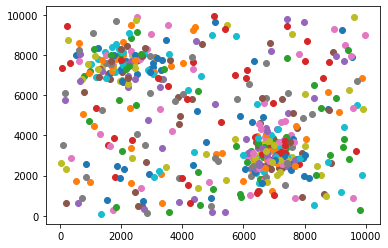

In [24]:
X = rand_coords() # arificial dataset from default data

def plot_2d(X):
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1])

plot_2d(X)

There are S = 200 possible BS sites. The operator has decided to deploy at
most Bmax = 30 BSs. Every UE generates a revenue of Ru = 1 and every BS
induces an operational cost of Cb = 5.